Vamos olhar uns arquivos de resultado de modelo .mat!

ps: se você tentar rodar isso em casa, não conseguirá plotar o mapa adequadamente, por conta de alguns arquivos auxiliares utilizados para plotar a linha de costa.

Se tiver interesse, procure pelo conjunto OpenStreetMap: https://www.openstreetmap.org/export#map=5/51.500/-0.100

A função ```make_map()``` será disponibilizada posteriormente para referência.

In [43]:
#importando bibliotecas
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from pyproj import Proj
import matplotlib.pyplot as plt


In [44]:
# Chamando a funções
from functions import make_map

In [45]:
# Caminho para os arquivos
path = '../dados/delft3d/'

In [46]:
# Caminho para os arquivos
#Altura de onda
pathhs = path+'hsigwaveheight_exemplo.mat'
#Direção da onda
pathdir = path+'meandirection_exemplo.mat'

print(pathhs)
print(pathdir)

/home/luiza/Documentos/MiniCursoPython/Exemplo_modelo/hsigwaveheight_exemplo.mat
/home/luiza/Documentos/MiniCursoPython/Exemplo_modelo/meandirection_exemplo.mat


- Biblioteca que vamos usar para ler o .mat
- Forma de instalar

```bash

conda install -c conda-forge scipy

```

In [47]:
#Importando scipy
import scipy.io as sio

In [48]:
# Abrindo arquivos .mat com resultado do modelo
#Altura de onda
wavehs = sio.loadmat(pathhs)
#Direção de onda
wavedir = sio.loadmat(pathdir)

In [49]:
wavedir['data'][0][0][6]

array([[738353.  ],
       [738353.25],
       [738353.5 ],
       [738353.75],
       [738354.  ],
       [738354.25],
       [738354.5 ],
       [738354.75],
       [738355.  ],
       [738355.25],
       [738355.5 ],
       [738355.75]])

In [66]:
#Extraindo as variaveis lon, lat
lon = wavehs['data'][0][0][0]
lat = wavehs['data'][0][0][1]

lon.shape

(39, 51)

In [51]:
#Extraindo as variaveis de onda
#Hs
hs = wavehs['data'][0][0][4]
#Dir x
dirx = wavedir['data'][0][0][4]
#Dir y
diry = wavedir['data'][0][0][5]

In [52]:
hs[0].shape

(39, 51)

In [53]:
diry.shape

(12, 39, 51)

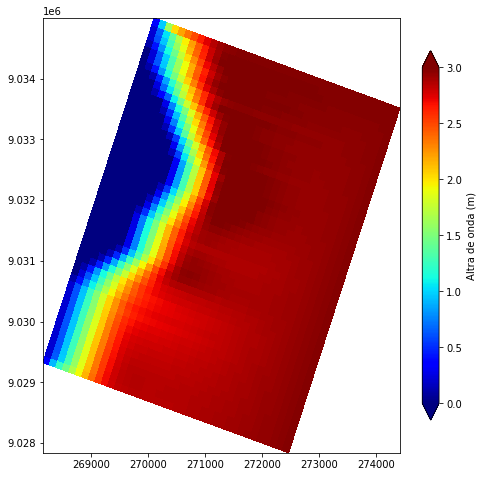

In [54]:
#plotando a batimetria
f, ax = plt.subplots(figsize=(8,8))
cp = ax.pcolor(lon, lat, hs[0], cmap='jet', vmin=0, vmax=3)
_= f.colorbar(cp,extend='both',ticks=np.arange(0,3.5,0.5), label='Altra de onda (m)',shrink=0.85)

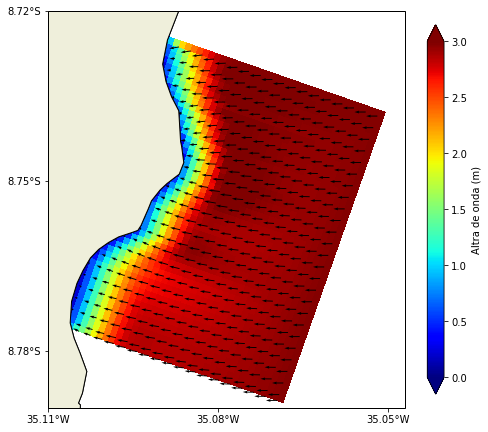

In [69]:
#Elaborando figura

upper_lat = -8.72
upper_lon = -35.047
lower_lat = -8.79
lower_lon = -35.11

extent = [lower_lon, upper_lon, lower_lat, upper_lat]

#corrigindo as coordenadas
myProj = Proj("+proj=utm +zone=25K, +ellps=WGS84 +south")

# creating figure with shapefile as coastline, polygon as coral reef and depth as colors
subplot_kw = dict(projection=ccrs.PlateCarree())

f, ax = plt.subplots(figsize=(8,8),
                       subplot_kw=subplot_kw)

# create map
ax = make_map(extent=extent, ax=ax, add_gridlines=False, add_features=True, 
              path_OSM='./data/OSM')

lons,lats = myProj(lon,lat,inverse=True) # modelo

#plotando a batimetria
cp = ax.pcolor(lons, lats, hs[0], cmap='jet', vmin=0, vmax=3)
f.colorbar(cp,extend='both',ticks=np.arange(0,3.5,0.5), label='Altra de onda (m)',shrink=0.85)

ax.quiver(lons[::2,::2], lats[::2,::2], dirx[0][::2,::2], diry[0][::2,::2])
# ax.quiver(lons[:-1,:-1], lats[:-1,:-1], dirx[0], diry[0])
ax.set_aspect('equal')

# add latitudes/longitudes manually, but nicely formatted
ax.set_yticks([-8.78, -8.75, -8.72], crs=ccrs.PlateCarree())
ax.set_xticks([-35.11, -35.08, -35.05], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
